<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM을 이용해 로이터 뉴스 카테고리 분석학 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=1000,test_split=0.2)

In [18]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [19]:
# 단어 수 맞추어 주기
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
# 모델구조 설정
model = Sequential()
model.add(Embedding(1000,100)) #1000 = 빈도 수,
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46, activation='softmax')) # 출력


In [21]:
#모델 실행 옵션
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [22]:
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5)

In [23]:
#모델 실행
history = model.fit(x_train, y_train, batch_size=20, epochs=200,
                    validation_data=(x_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 11s 10ms/step - loss: 2.2155 - accuracy: 0.4283 - val_loss: 1.8480 - val_accuracy: 0.5312
Epoch 2/200
450/450 [==============================] - 4s 10ms/step - loss: 1.8019 - accuracy: 0.5323 - val_loss: 1.8199 - val_accuracy: 0.5232
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.5967 - accuracy: 0.6011 - val_loss: 1.5853 - val_accuracy: 0.6064
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3974 - accuracy: 0.6516 - val_loss: 1.4049 - val_accuracy: 0.6549
Epoch 5/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2572 - accuracy: 0.6800 - val_loss: 1.3982 - val_accuracy: 0.6527
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.1599 - accuracy: 0.7040 - val_loss: 1.2559 - val_accuracy: 0.6772
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0527 - accuracy: 0.7337 - val_loss: 1.2365 - val_accuracy: 0

In [24]:
#테스트 정확도 측정
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 4ms/step - loss: 1.2320 - accuracy: 0.7155

 Test Accuracy: 0.7155


In [26]:
#학습셋과 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

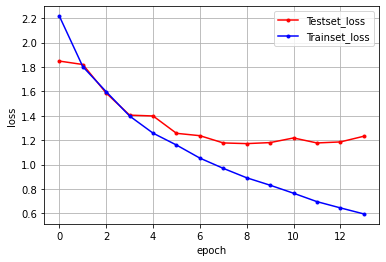

In [29]:
#그래프로 표현해 보자
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss,marker='.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue',label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()